sobre o dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

link do dataset(bank-full): https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

In [1]:
#importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_bank = pd.read_csv('bank-full.csv', delimiter = ";")
df_bank.columns


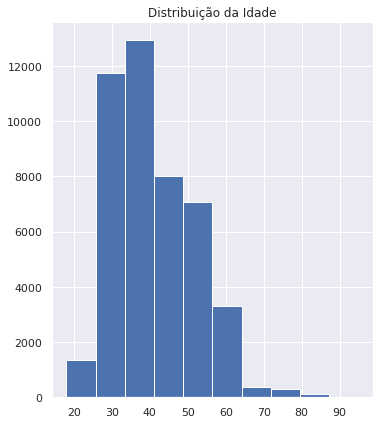

In [51]:
response_binary =df_bank['y'].map({'yes':1, 'n0': 0})
dist_age_balance = plt.figure(figsize = (10,6))
ra1 = dist_age_balance.add_subplot(1,2,1)
ra1.hist(df_bank['age'])
ra1.set_title('Distribuição da Idade')
plt.tight_layout()
plt.show()

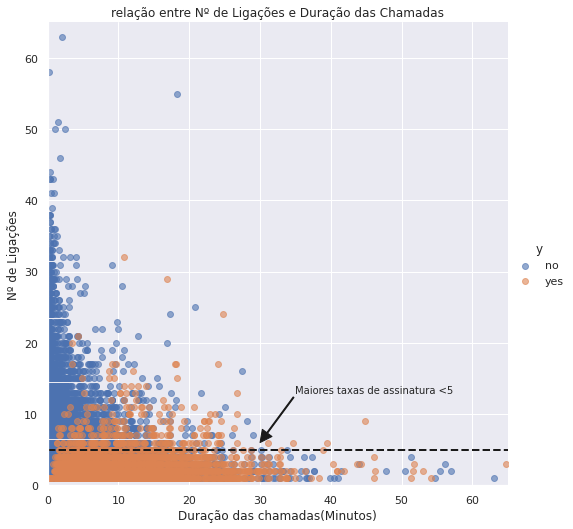

In [3]:
df_bank['duration'] = df_bank['duration'].apply(lambda n:n/60).round(2)
dur_cam = sns.lmplot(data = df_bank[['duration','campaign','y']], x = 'duration', y = 'campaign', hue = 'y', fit_reg= False, scatter_kws={'alpha':0.6}, height = 7)
plt.axis([0,65,0,65])
plt.ylabel('Nº de Ligações')
plt.xlabel('Duração das chamadas(Minutos)')
plt.title('relação entre Nº de Ligações e Duração das Chamadas')
plt.axhline( y =5, linewidth = 2, color = "k", linestyle = '--')
plt.annotate('Maiores taxas de assinatura <5', xytext = (35,13), 
             arrowprops = dict(color = 'k', width = 1), xy = (30,6))
plt.show()

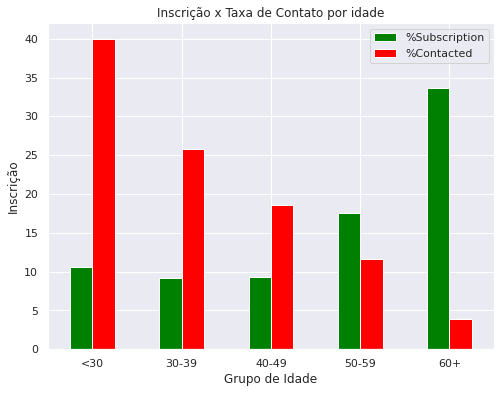

In [4]:
lista = [df_bank]

for column in lista:
  column.loc[column["age"]<30,'age_group'] =20
  column.loc[(column["age"]>=30) & (column["age"] <= 39),'age_group'] =30
  column.loc[(column["age"]>=40) & (column["age"] <= 49),'age_group'] =40
  column.loc[(column["age"]>=50) & (column["age"] <= 59),'age_group'] =50
  column.loc[column["age"]>= 60,'age_group'] =60

count_age_response_pct = pd.crosstab(df_bank['y'], df_bank['age_group']).apply(lambda x:x/x.sum()*100)
count_age_response_pct = count_age_response_pct.transpose()

age = pd.DataFrame(df_bank['age_group'].value_counts())
age['%Contacted'] = age['age_group']*100/age['age_group'].sum()
age['%Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1, inplace = True)
age['age'] = [20,30,40,50,60]
age=age.sort_values('age', ascending = True)
plot_age = age[['%Subscription', '%Contacted']].plot(kind = 'bar',figsize = (8,6), color = ('green','red'))
plt.xlabel('Grupo de Idade')
plt.ylabel('Inscrição')
plt.xticks(np.arange(5),('<30','30-39','40-49','50-59','60+'), rotation = 'horizontal')
plt.title('Inscrição x Taxa de Contato por idade')
plt.show()

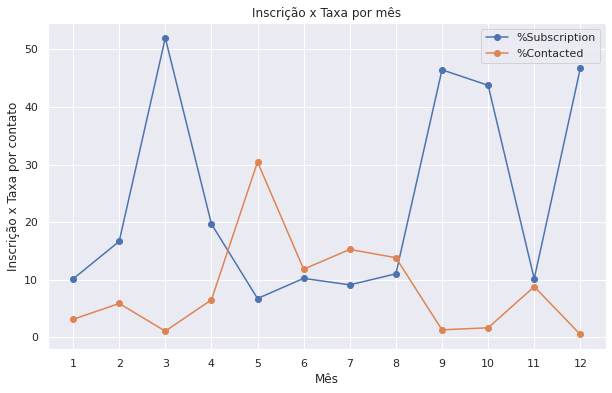

In [42]:

for column in lista:
  column.loc[column['month']== 'jan','month_int'] = 1
  column.loc[column['month']== 'feb','month_int'] = 2
  column.loc[column['month']== 'mar','month_int'] = 3
  column.loc[column['month']== 'apr','month_int'] = 4
  column.loc[column['month']== 'may','month_int'] = 5
  column.loc[column['month']== 'jun','month_int'] = 6
  column.loc[column['month']== 'jul','month_int'] = 7
  column.loc[column['month']== 'aug','month_int'] = 8
  column.loc[column['month']== 'sep','month_int'] = 9
  column.loc[column['month']== 'oct','month_int'] = 10
  column.loc[column['month']== 'nov','month_int'] = 11
  column.loc[column['month']== 'dec','month_int'] = 12
  
count_month_response_pct = pd.crosstab(df_bank["y"],df_bank["month_int"]).apply(lambda x:x/x.sum()*100)
count_month_response_pct = count_month_response_pct.transpose()

month = pd.DataFrame(df_bank['month_int'].value_counts())
month['%Contacted'] = month['month_int']*100/month['month_int'].sum()
month['%Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1, inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]

month = month.sort_values('Month',ascending = True)

month = month.sort_values('Month',ascending = True)

plot_month = month[['%Subscription','%Contacted']].plot(kind = 'line',figsize = (10,6), marker = 'o')
plt.xlabel('Mês')
plt.ylabel('Inscrição x Taxa por contato')
plt.title('Inscrição x Taxa por mês')


ticks = np.arange(1,13,1)
plt.xticks(ticks)
plt.show()


##Classificador KNN



In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import random

In [54]:
key_random = random.SystemRandom()
seed = key_random.randint(0,9999)

In [ ]:
df_bank.drop(['marital'],axis = 1, inplace= True)
dataset1= df_bank.iloc[:,0:7]

In [57]:
dataset2 = pd.get_dummies(dataset1, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
for i in ['housing','default','loan']:
  dataset2[i] = dataset2[i].map({'yes': 1,'no': 0})


df_bank['y'] = df_bank['y'].map({'yes': 1,'no': 0})


In [60]:
y = df_bank['y']
X = dataset2
X_train, X_test, y_train,y_test = train_test_split (X,y,test_size = 0.3, random_state = seed, stratify = y)

In [61]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [63]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
print(knn.score(X_test,y_test))

0.8804924800943674


##CLASSIFICAÇÃO COM REDE NEURAL

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [70]:
MLP = MLPClassifier(hidden_layer_sizes=(100,90,30), random_state = seed, max_iter = 1000)


In [72]:
cv_results = cross_val_score (MLP, X,y,cv = 10)

In [73]:
print(cv_results)
print(np.mean(cv_results))

[0.88301636 0.88321168 0.88299049 0.88299049 0.88299049 0.88299049
 0.88299049 0.88321168 0.88299049 0.8761336 ]
0.8823516253845514
